# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isna().sum(), test.isna().sum()

(id             0
 keyword       44
 location    1760
 text           0
 target         0
 dtype: int64,
 id            0
 keyword      17
 location    773
 text          0
 target        0
 dtype: int64)

In [6]:
train = train.fillna('')
test = test.fillna('')

In [7]:
train.head()

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0


не очень понимаю, почему мы заполняем пропуски после разделения на тест и трейн... все равно же обе выборки предобрабатывать надо, почему не сделать предобработку сраза в data?

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [8]:
train.target.value_counts()

0    3024
1    2305
Name: target, dtype: int64

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [9]:
popular_keywords = train.keyword.value_counts()[:11].index.tolist()[1:]
popular_keywords

['damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'refugees',
 'derail',
 'fear',
 'tsunami',
 'fatality']

In [10]:
popular_keywords_rows = train.loc[train['keyword'].isin(popular_keywords)]

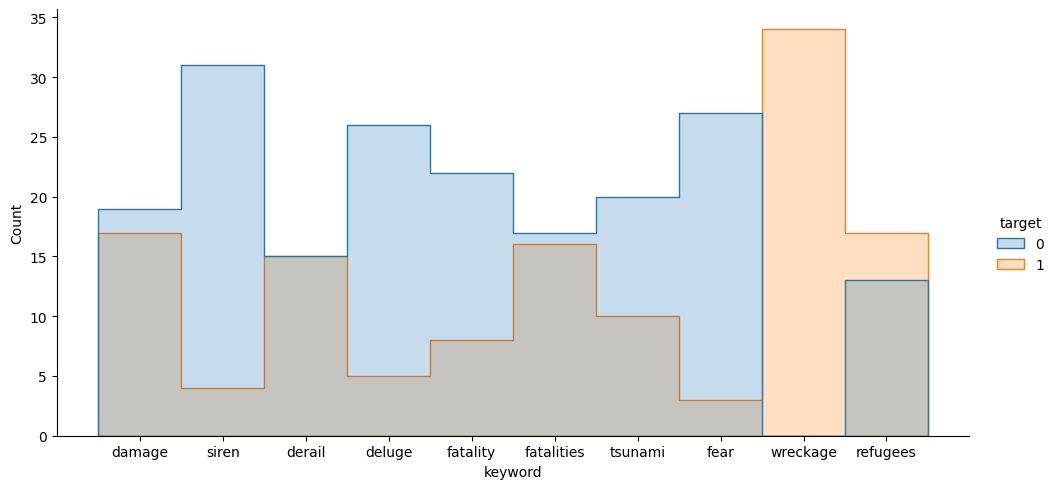

In [11]:
sns.displot(popular_keywords_rows, x='keyword', hue="target", height=5, aspect=2, element="step")
plt.show()

**Выводы**: 

все твиты из выборки, у которых ключевым словом является wreckage, содержат информацию о настоящей катастрофе. 

твиты со словом refugees чаще всего сообщают о реальной катастрофе.

из всех твитов  с ключевым словом derail ровно в половине упоминается о действительно произошедших несчастных случаях.

однако чаще всего твиты все-таки не сообщают о реальном инциденте, несмотря на то что имеют ключевое слово с соответствующей, казалось бы, семантикой.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [12]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [13]:
train_new = train.drop('id', axis=1)
train_new['text'] = [' '.join(i) for i in zip(train['keyword'], train['location'], train['text'])]
train_new = train_new.drop(['keyword', 'location'], axis=1)

In [14]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [15]:
test_new = test.drop('id', axis=1)
test_new['text'] = [' '.join(i) for i in zip(test['keyword'], test['location'], test['text'])]
test_new = test_new.drop(['keyword', 'location'], axis=1)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [16]:
x_train, x_test, y_train, y_test = train_new.text, test_new.text, train_new.target, test_new.target

In [17]:
x_train

1186    bridge%20collapse  Ashes 2015: AustraliaÛªs c...
4071    hail Carol Stream, Illinois GREAT MICHIGAN TEC...
5461    police Houston  CNN: Tennessee movie theater s...
5787    rioting  Still rioting in a couple of hours le...
7445    wounds Lake Highlands Crack in the path where ...
                              ...                        
5226    obliteration Merica! @Eganator2000 There aren'...
5390    panic  just had a panic attack bc I don't have...
860     blood  Omron HEM-712C Automatic Blood Pressure...
7603      Officials say a quarantine is in place at an...
7270    whirlwind Stamford & Cork (& Shropshire) I mov...
Name: text, Length: 5329, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(x_train)

In [19]:
bow

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [20]:
list(vectorizer.vocabulary_.keys())[:20]

['bridge',
 '20collapse',
 'ashes',
 '2015',
 'australia',
 'ûªs',
 'collapse',
 'at',
 'trent',
 'among',
 'worst',
 'in',
 'history',
 'england',
 'bundled',
 'out',
 'for',
 '60',
 'http',
 'co']

In [21]:
def contains_digit(s: str) -> bool:
    return any(char.isdigit() for char in s)

def contains_punctuation(s: str) -> bool:
    return any(char in punctuation for char in s)

def is_hashtag(s: str) -> bool:
    return s.startswith('#')

def is_mention(s: str) -> bool:
    return s.startswith('@')

def investigate_vocabulary(vocabulary: dict):
  print('With digit:', sum(contains_digit(token) for token in vocabulary))
  print('With punctuation:', sum(contains_punctuation(token) for token in vocabulary))
  print('With punctuation except # and @:', 
        sum(contains_punctuation(token) and not is_hashtag(token) and not is_mention(token) for token in vocabulary))
  print('Hashtags:', sum(is_hashtag(token) for token in vocabulary))
  print('Mentions:', sum(is_mention(token) for token in vocabulary))

In [22]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit: 2
With punctuation: 7
With punctuation except # and @: 3
Hashtags: 1
Mentions: 3


In [23]:
investigate_vocabulary(vectorizer.vocabulary_)

With digit: 3812
With punctuation: 315
With punctuation except # and @: 315
Hashtags: 0
Mentions: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [24]:
from nltk.tokenize import TweetTokenizer

In [25]:
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
vectorizer = CountVectorizer(tokenizer=tweet_tokenizer.tokenize)
bow = vectorizer.fit_transform(x_train)

In [26]:
bow

<5329x17989 sparse matrix of type '<class 'numpy.int64'>'
	with 92646 stored elements in Compressed Sparse Row format>

In [27]:
investigate_vocabulary(vectorizer.vocabulary_)

With digit: 3645
With punctuation: 5669
With punctuation except # and @: 4189
Hashtags: 1470
Mentions: 10


In [28]:
list(vectorizer.vocabulary_.keys())[:20]

['bridge',
 '%',
 '20collapse',
 'ashes',
 '2015',
 ':',
 'australia',
 '\x89',
 'ûªs',
 'collapse',
 'at',
 'trent',
 'among',
 'worst',
 'in',
 'history',
 'england',
 'bundled',
 'out',
 'for']

**Сравнение:** стало чуть меньше токенов с цифрами, почти в 20 раз больше токенов с пунктуацией, и наконец-то появились хэштеги и отметки

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [29]:
import re
from nltk.stem.snowball import SnowballStemmer

In [30]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [31]:
def contains_only_latin_letters(s: str) -> bool:
    return re.match(r'^[a-zA-Z]+$', s)

def is_emoji(s: str) -> bool:
    return (all(char in punctuation for char in s) and ('(' in s or ')' in s))

def is_hashtag(s: str) -> bool:
  if re.match(r'^#[a-zA-Z]+$', s):
    return re.match(r'^#[a-zA-Z]+$', s)

def custom_tokenizer(s: str) -> List[str]:
  correct_tokens = []
  stemmer = SnowballStemmer('english')
  tokens = TweetTokenizer(strip_handles=True, reduce_len=True).tokenize(s)

  for token in tokens:
    if contains_only_latin_letters(token) and token.lower() not in stopwords:
      correct_tokens.append(stemmer.stem(token))
    elif is_emoji(token) or is_hashtag(token):
      correct_tokens.append(token)

  return correct_tokens

In [32]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [33]:
for tokens in x_train.apply(lambda x: custom_tokenizer(x))[:10]:
  print(tokens)

['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#GoBlue', '#WrestleOn']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#MLB']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', '(', 'ask', ')', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', 'suspec

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [34]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 1))
bow = vectorizer.fit_transform(x_train)
bow_test = vectorizer.transform(x_test)

In [35]:
bow, bow_test

(<5329x10498 sparse matrix of type '<class 'numpy.int64'>'
 	with 50926 stored elements in Compressed Sparse Row format>,
 <2284x10498 sparse matrix of type '<class 'numpy.int64'>'
 	with 19260 stored elements in Compressed Sparse Row format>)

2. Обучите LogisticRegression на полученных признаках.


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(bow, y_train)
y_pred = log_reg.predict(bow_test)

3. Посчитайте метрику f1-score на тестовых данных.

In [37]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7447280799112098

In [38]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 2))
bow = vectorizer.fit_transform(x_train)
bow_test = vectorizer.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(bow, y_train)
y_pred = log_reg.predict(bow_test)

f1_score(y_test, y_pred)

0.732912119471568

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 1))
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(vec_train, y_train)
y_pred = log_reg.predict(vec_test)

f1_score(y_test, y_pred)

0.7446924333151876

In [40]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 2))
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(vec_train, y_train)
y_pred = log_reg.predict(vec_test)

f1_score(y_test, y_pred)

0.7483801295896328

1. **Ответ:** tfidf векторизатор повысил кач-во только при ngram_range=(1, 2), при ngram_range=(1, 1) кач-во немного ухудшилось

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [41]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(vec_train, y_train)
y_pred = log_reg.predict(vec_test)

f1_score(y_test, y_pred)

0.7446924333151876

In [42]:
vec_train

<5329x10498 sparse matrix of type '<class 'numpy.float64'>'
	with 50926 stored elements in Compressed Sparse Row format>

2. **Ответ:** сравнивая с tfidf векторизатором с ngram_range=(1, 2), ни размер матрицы, ни кач-во модели не изменились при уменьшении max_df до 0.9

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [43]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=0.0005)
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(vec_train, y_train)
y_pred = log_reg.predict(vec_test)

f1_score(y_test, y_pred)

0.7489130434782609

In [44]:
vec_test

<2284x3133 sparse matrix of type '<class 'numpy.float64'>'
	with 17087 stored elements in Compressed Sparse Row format>

3. **Ответ:** кач-во модели улучшилось! уменьшение min_df с 1 до 0.0005 побило наибольший f1 score, полученный при tfidf векторизаторе с параметром ngram_range=(1, 2)

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [45]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(vec_train, y_train)
y_pred = log_reg.predict(vec_test)

print('F1 score:', f1_score(y_test, y_pred))

F1 score: 0.728160607704829


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** tfidf векторизатор с min_df=0.0005

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [46]:
vectorizer = TfidfVectorizer(analyzer='char', min_df=0.0005, ngram_range=(1, 5))
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(vec_train, y_train)
y_pred = log_reg.predict(vec_test)

f1_score(y_test, y_pred)

0.7503991484832357